In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

In [2]:
# Import necessary libraries
import networkx as nx
from core.neuron import Neuron, Synapse
from core.brain import Brain

# Create some neurons
neuron1 = Neuron(
    id="neuron1",
    args={"prompt": "Hello, Neuron 1!"},
    run_kargs={"temperature": 0.7},
    predecessors={},
    triggers=["neuron2"],
    is_terminal=False
)

neuron2 = Neuron(
    id="neuron2",
    args={"prompt": "Hello, Neuron 2!"},
    run_kargs={"temperature": 0.5},
    predecessors={},
    triggers=["neuron1"],
    is_terminal=False
)

neuron3 = Neuron(
    id="neuron3",
    args={"prompt": "Hello, Neuron 3!"},
    run_kargs={"temperature": 0.3},
    predecessors={},
    triggers=["neuron1,neuron2"],
    is_terminal=True
)

In [3]:
# Create some synapses
synapse1 = Synapse(sender_neuron_id="neuron1", receiver_neuron_id="neuron2")
synapse2 = Synapse(sender_neuron_id="neuron2", receiver_neuron_id="neuron3")
synapse3 = Synapse(sender_neuron_id="neuron1", receiver_neuron_id="neuron3")

In [4]:
# Create a brain and add neurons and synapses
brain = Brain(name="TestBrain")
brain.add_neuron(neuron1)
brain.add_neuron(neuron2)
brain.add_neuron(neuron3)

brain.add_synapse(synapse1)
brain.add_synapse(synapse2)
brain.add_synapse(synapse3)

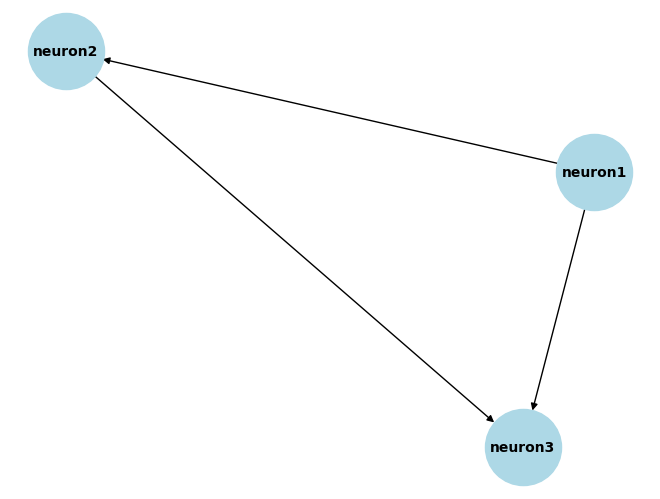

In [5]:
# Display the brain graph
pos = nx.spring_layout(brain.graph)
nx.draw(brain.graph, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

In [8]:
brain.config

{'name': 'TestBrain',
 'neurons': {'neuron1': {'id': 'neuron1',
   'args': {'prompt': 'Hello, Neuron 1!'},
   'run_kargs': {'temperature': 0.7},
   'triggers': ['neuron2']},
  'neuron2': {'id': 'neuron2',
   'args': {'prompt': 'Hello, Neuron 2!'},
   'run_kargs': {'temperature': 0.5},
   'triggers': ['neuron1']},
  'neuron3': {'id': 'neuron3',
   'args': {'prompt': 'Hello, Neuron 3!'},
   'run_kargs': {'temperature': 0.3},
   'triggers': ['neuron1,neuron2'],
   'is_terminal': True}},
 'synapses': ['neuron1 -> neuron2',
  'neuron2 -> neuron3',
  'neuron1 -> neuron3']}

In [9]:
brain.save_config('brain_config.yaml')